<a href="https://colab.research.google.com/github/vaaaaaa/python-projects/blob/main/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
BostonTrain = pd.read_csv("/content/Boston_Housing (2).csv")

In [ ]:
BostonTrain.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


In [ ]:
BostonTrain.info()
BostonTrain.describe()

now

<Axes: xlabel='RM', ylabel='MEDV'>

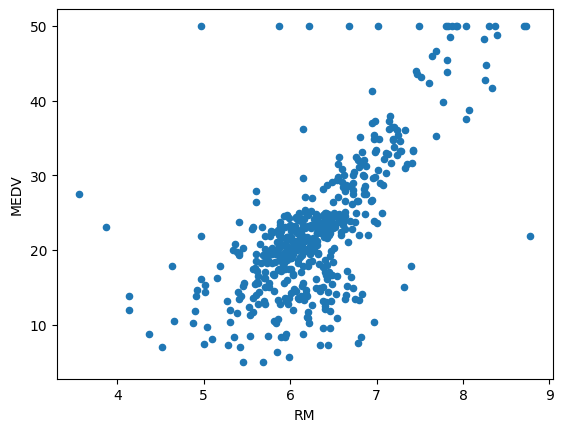

In [ ]:
BostonTrain.plot.scatter('RM', 'MEDV')

<Axes: >

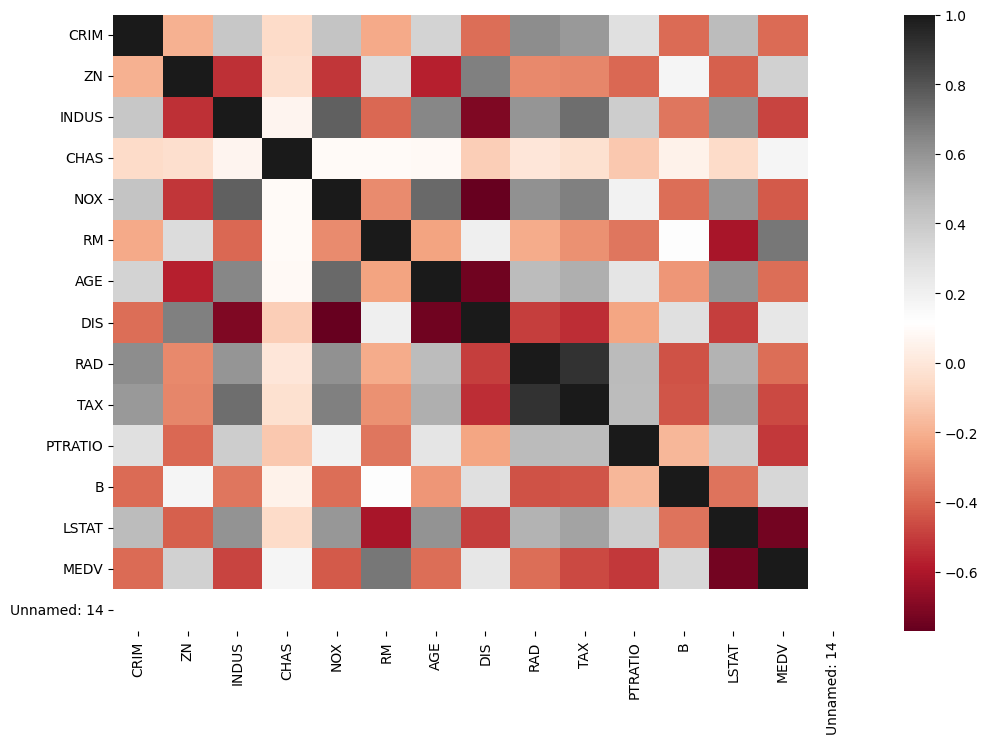

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(BostonTrain.corr(), cmap = 'RdGy')

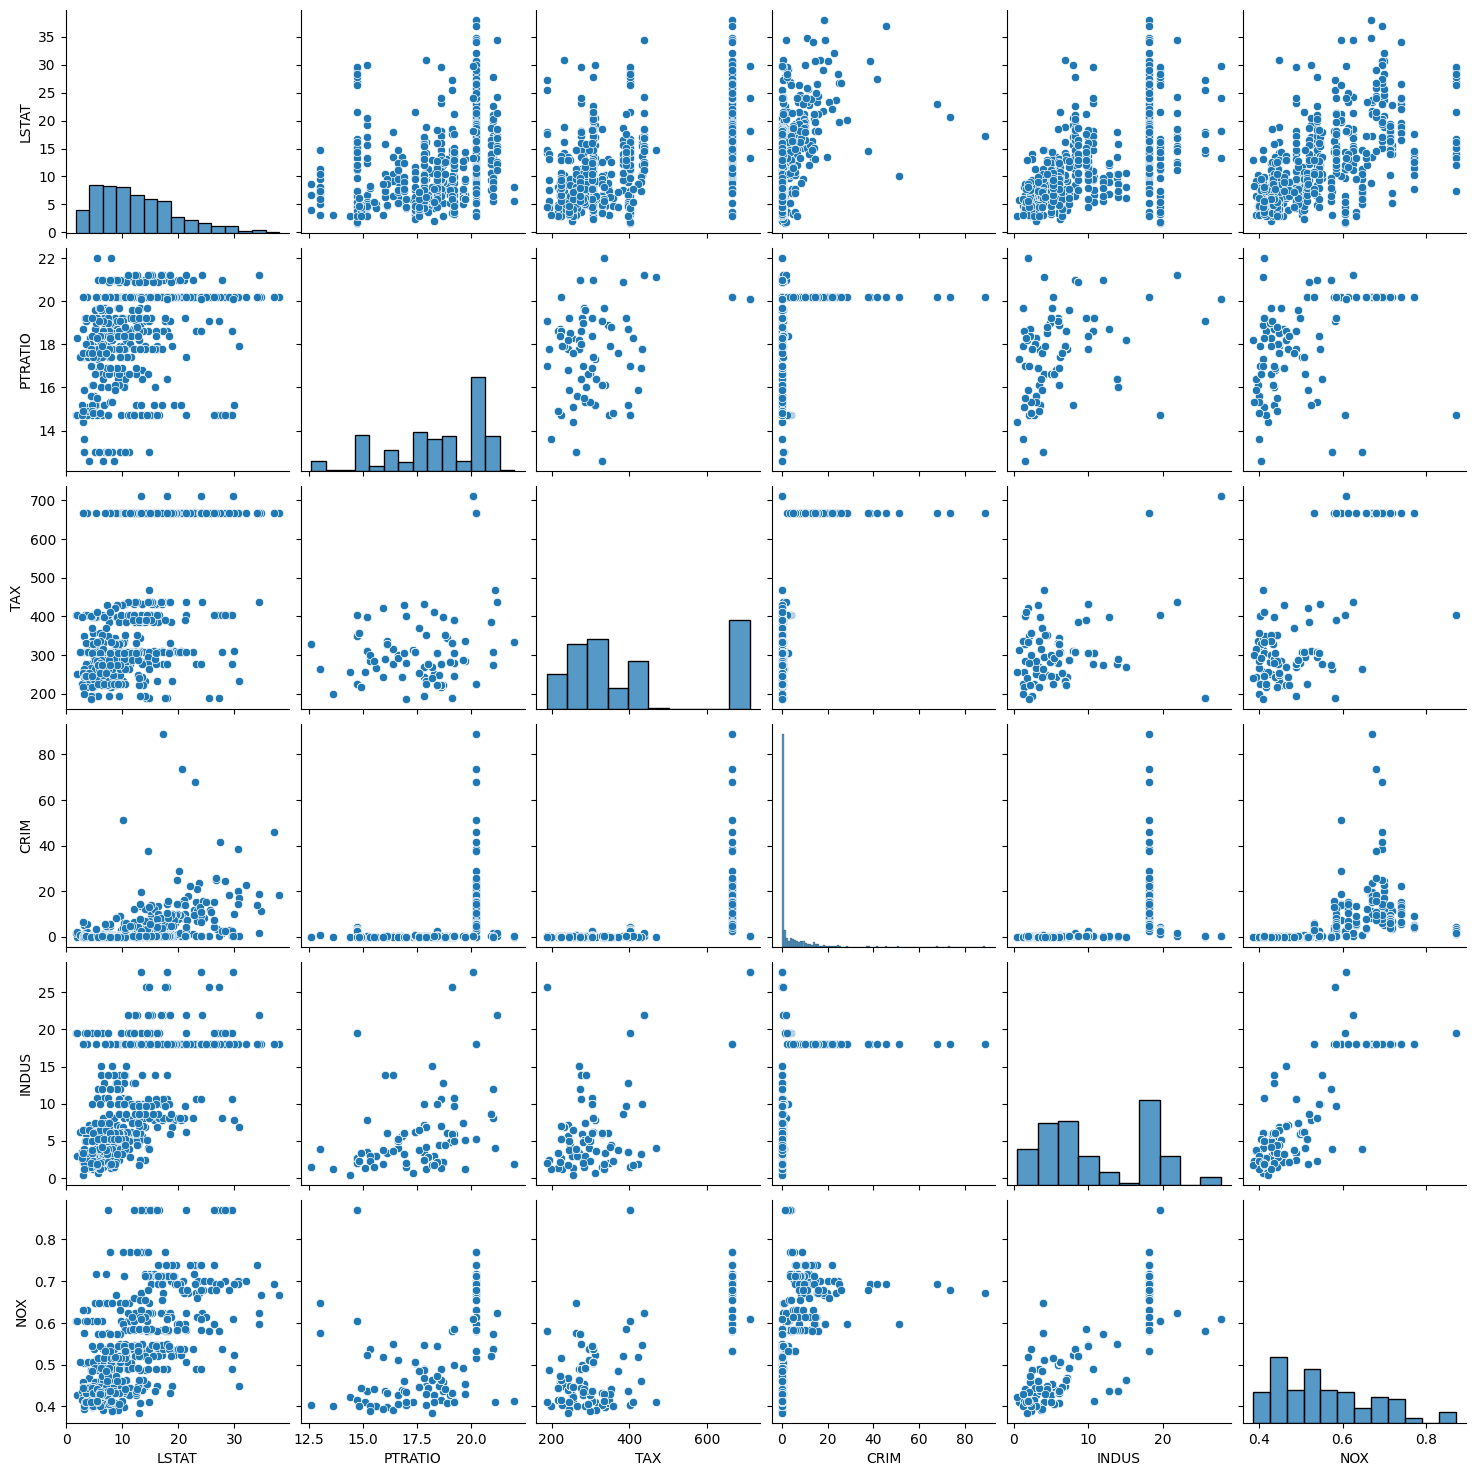

In [ ]:
sns.pairplot(BostonTrain, vars=['LSTAT','PTRATIO','TAX','CRIM','INDUS','NOX'])

TRAINING LINEAR REGRESSION MODEL
Define X and Y

X:Variable named as predictors,

Y:Variable named as response

In [ ]:
X = BostonTrain[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = BostonTrain['MEDV']


IMPORT SKLEARN LIB
train_test_split,to split the data into training and testing dataframes
Linear regression to apply the linear regression.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [ ]:
BH = LinearRegression()
BH.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import accuracy_score
BH.score(X_train,y_train)

0.7698967749074351

In [ ]:
predictions=BH.predict(X_test)
print(predictions)

[31.85734502 12.50664356 24.05782478 19.60977629  9.57667556 20.29673399
 31.65685936 25.4845951  22.6319975  19.99675713 19.98041541 30.08848417
 27.92443204 28.80194589 14.72230367 19.45335225 11.97398672 20.49170968
 25.17666711 18.81495391 36.78503135 28.844461   20.57104761  6.8152436
 13.90740229 17.4823747  21.28172313 19.26824467 20.15357392 11.45363353
 24.107648   11.6646997  34.99945219 15.86270131 16.12149321 36.89948138
 13.64145484 17.17058528  9.05933247 29.51009616 18.85700423 26.98062014
 20.34745858 20.94072417 30.70008461  9.13309627 19.20015456 33.08005158
 14.83692399  2.00069045 27.02173371 33.51038186 31.61141848 25.48874889
 22.57259484 19.34812486 25.25029183 40.3245726  21.4941182  17.27542666
 34.68901316 39.1413304  20.89812016 21.88125327 31.02044011 23.05466617
 41.26608377  8.48646936 19.58454964  6.00327747 18.25619847 11.45475977
 33.44436646 23.50304747  9.92627958 25.91480495 31.54163884 33.64379438
 20.54150097 39.4137185  25.44941288 23.53243835 17.

Text(0, 0.5, 'Predicted Y')

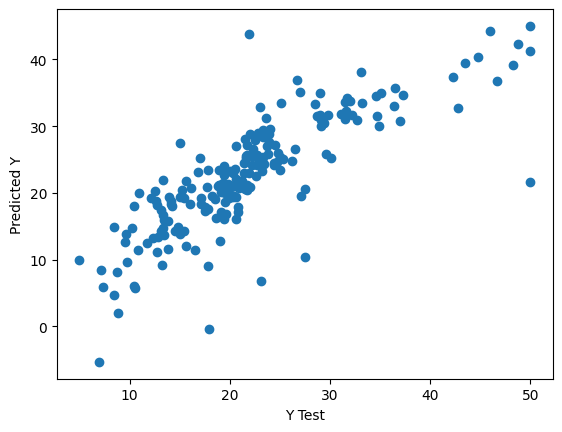

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [ ]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE 3.6507433708800985
MSE 27.89349507445621
RMSE 5.281429264361704


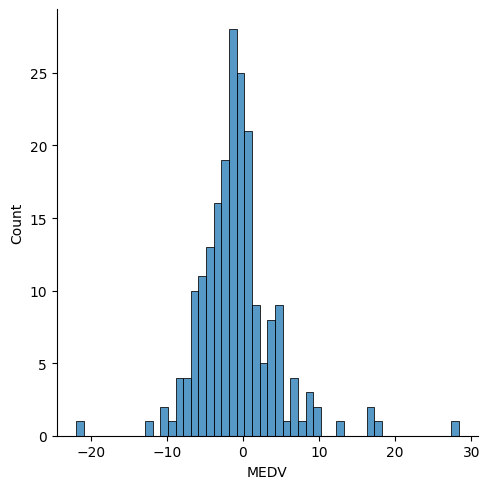

In [ ]:
sns.displot((y_test-predictions),bins=50);

<ipython-input-32-5f2bc21c0ef7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


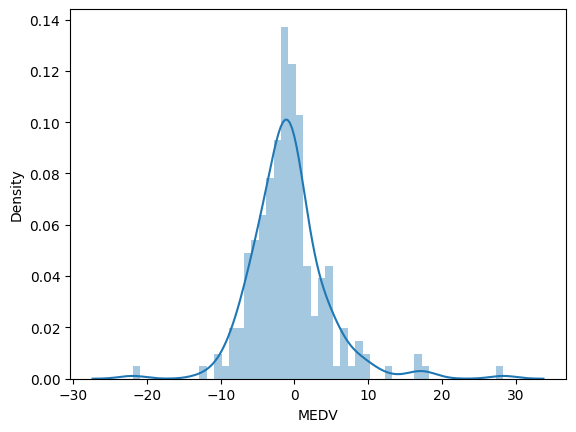

In [ ]:
sns.distplot((y_test-predictions),bins=50);

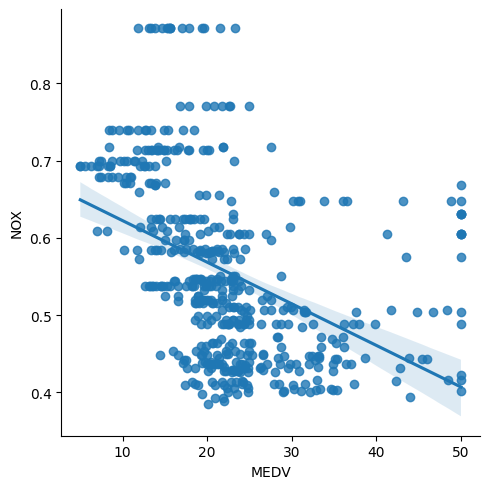

In [ ]:
sns.lmplot(x='MEDV',y='NOX',data=BostonTrain)

In [ ]:
coefficients = pd.DataFrame(BH.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
CRIM,-0.082786
ZN,0.036574
INDUS,0.056373
CHAS,5.883745
NOX,-17.501416
RM,5.166130
AGE,-0.002071
DIS,-1.383266
RAD,0.276314
TAX,-0.011797


from matplotlib import pyplot as plt
coefficients['coefficients'].plot(kind='hist', bins=20, title='coefficients')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
coefficients['coefficients'].plot(kind='line', figsize=(8, 4), title='coefficients')
plt.gca().spines[['top', 'right']].set_visible(False)